<a href="https://colab.research.google.com/github/Matheusups/Datasets/blob/main/ProjetoMineracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret-ts-alpha

     |████████████████████████████████| 479 kB 5.5 MB/s 
     |████████████████████████████████| 1.4 MB 50.2 MB/s 
     |████████████████████████████████| 25.3 MB 1.9 MB/s 
     |████████████████████████████████| 6.1 MB 47.3 MB/s 
     |████████████████████████████████| 2.0 MB 44.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 261 kB 58.6 MB/s 
     |████████████████████████████████| 1.3 MB 50.9 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 1.7 MB 38.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 59.3 MB/s 
     |████████████████████████████████| 9.5 MB 10.3 MB/s 
     |████████████████████████████████| 16.9 MB 25.9 MB/s 
     |█████████████████

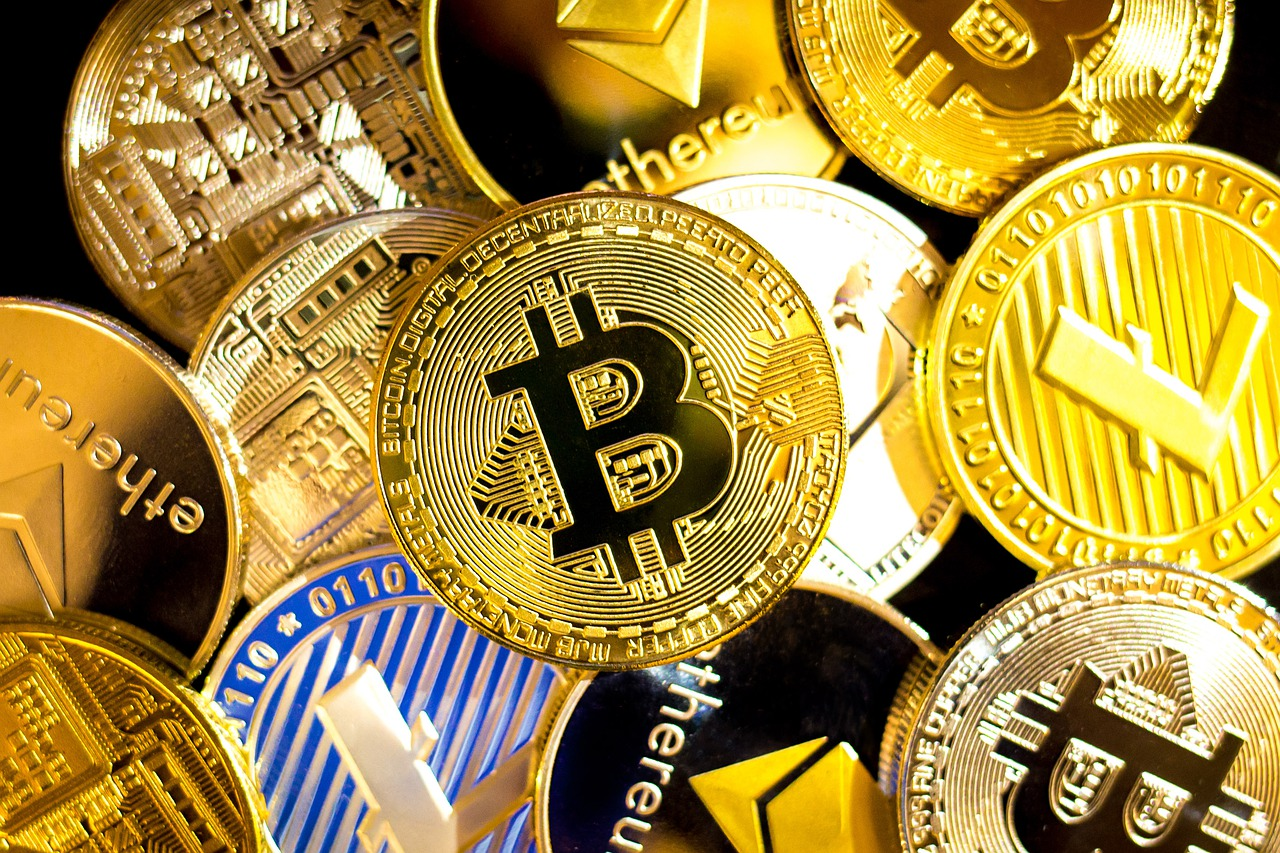

##**O mercado de criptomoedas é conhecido por sua volatilidade!** 
####Case ▶ no site Blockchain.org é possível encontrar informações sazonais sobre a variação de valor das criptomoedas mais valorizadas como o Bitcoin, Ethereum e outras AltCoins que tenham suas ideias consolidadas e credibilizadas pelo mercado.

# Objetivo da Pesquisa❎

>>> Dados de https://www.blockchain.com/pt/charts/market-price




Analisar a variação em USD (Dólar) do valor indívidual do Bitcoin e projetar uma analíse para 365 dias posterior ao último registro do dataset.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/market-price.csv')

In [ ]:
dados.head()

,Timestamp,market-price
0,2020-11-24 00:00:00,18398.91
1,2020-11-25 00:00:00,19172.52
2,2020-11-26 00:00:00,18739.80
3,2020-11-27 00:00:00,17151.44
4,2020-11-28 00:00:00,17138.87


##**As colunas Timestamp e Market-price podem ter tipos de dados incompátiveis com o trabalho a seguir então vamos explorar as informações do dataframe.**

In [ ]:
dados['Timestamp'] = pd.to_datetime(dados['Timestamp'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     366 non-null    datetime64[ns]
 1   market-price  366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [ ]:
dados.set_index('Timestamp', drop=True, inplace=True)

In [ ]:
#Essas linhas de códigos servem para indexar o dataframe por data.
dados

,market-price
Timestamp,
2020-11-24,18398.91
2020-11-25,19172.52
2020-11-26,18739.80
2020-11-27,17151.44
2020-11-28,17138.87
...,...
2021-11-20,58133.02
2021-11-21,59777.98
2021-11-22,58755.90




1.  **Vamos plotar um gráfico para ter uma melhor visão sobre o periodo dos dados e ter uma melhor noção de como eles se comportam**
2.   **Em seguida vamos iniciar o processo de treino de um algoritmo de timeseries com pycaret, uma ferramenta de AutoML presente na biblioteca**

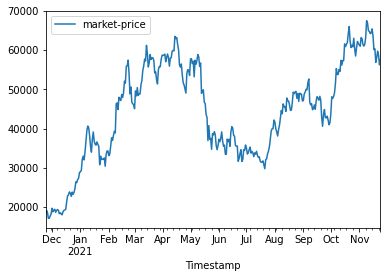

In [ ]:
dados.plot()

In [ ]:
from pycaret.time_series import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


A função setup predefine alguns parametros como números de registros para teste e treino, número de ramificações de treino. Seasonal_period define o Ano

In [ ]:
setup(dados, fh=30, fold=5, seasonal_period='Y',)

,Description,Value
0,session_id,7597
1,Original Data,"(366, 1)"
2,Missing Values,False
3,Transformed Train Set,"(336,)"
4,Transformed Test Set,"(30,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,5
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,SeasonalPeriod.A
9,Seasonality Detected,False


In [ ]:
teste_modelo = compare_models(exclude='auto_arima')

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,5044.43,5931.14,0.1092,0.1133,-1.9088,0.022
exp_smooth,Exponential Smoothing,5050.54,5936.84,0.1094,0.1135,-1.9156,0.036
naive,Naive Forecaster,5138.25,6030.99,0.1082,0.1162,-1.7524,0.956
snaive,Seasonal Naive Forecaster,5138.25,6030.99,0.1082,0.1162,-1.7524,0.014
theta,Theta Forecaster,5302.9,6214.91,0.1143,0.1201,-2.1426,0.020
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,5476.36,6427.87,0.1279,0.1245,-4.3692,0.028
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,5563.33,6514.41,0.1244,0.1273,-3.0861,0.096
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,5693.6,6640.25,0.1271,0.1306,-3.2502,2.058
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,5862.05,6822.27,0.1288,0.1343,-3.2147,2.014
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,6169.72,7178.05,0.1492,0.1391,-7.9754,0.026


In [ ]:
prev_mod = create_model('lr_cds_dt')
prev_mod2 = create_model('ets')
prev_mod3 = create_model('exp_smooth')

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2021-05-28,3902.8578,4692.3228,0.1137,0.1048,-3.0147
1,2021-06-27,1627.0169,1932.4994,0.0490,0.0488,-0.4906
2,2021-07-27,6041.4244,6694.2930,0.1317,0.1428,-2.6636
3,2021-08-26,3474.8160,4381.8925,0.0770,0.0725,-1.8530
4,2021-09-25,10206.5827,11983.2013,0.1755,0.1983,-1.5559
Mean,NaN,5050.5396,5936.8418,0.1094,0.1135,-1.9156
SD,NaN,2935.5483,3380.3446,0.0438,0.0529,0.8867


In [ ]:
plot_model(prev_mod,plot='ts') #decomp_stl

## É possível identificar uma tendencia de queda do valor em "trend" mensalmente, entre os dias 15-25 sempre tem uma baixa.

In [ ]:
plot_model(prev_mod2,plot='decomp_stl')

In [ ]:
plot_model(prev_mod, plot='train_test_split')

In [ ]:
plot_model(prev_mod3, plot='train_test_split')

In [ ]:
final = finalize_model(prev_mod2)
final

AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, ignore_inf_ic=True,
        information_criterion='aic', initial_level=None, initial_seasonal=None,
        initial_trend=None, initialization_method='estimated', maxiter=1000,
        missing='none', n_jobs=None, restrict=True, return_params=False,
        seasonal=None, sp=<SeasonalPeriod.A: 1>, start_params=None,
        trend='add')

In [ ]:
plot_model(final, plot='forecast')

### Temos uma projeção para 1 ano de crescimento do valor do bitcoin, baseado em um crescimento linear médio, já o intervalo de predição demonstra a margem de erro ou variabilidade que o valor pode sofrer dentro de **X** periodo.

In [ ]:
plot_model(final, plot='forecast', data_kwargs={'fh':365})